Importing Useful Libraries. Some of them are imported later as per use. 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

Removing the Id column from the dataframe and its corresponding values

In [4]:
pop_id = data_test.pop('id')
data_train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [5]:
ID = data_train.pop('id').values.tolist()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [6]:
species = data_train['species']
species = np.array(species)
species = np.unique(species,return_counts=True)
print("Number of Species : "+str(species[0].shape[0]))

Number of Species : 99


In [7]:
from sklearn.model_selection import train_test_split
y_train = data_train.pop('species')
x_train = data_train

print(y_train.shape)
print(x_train.shape)

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)

(990,)
(990, 192)


## Testing Some Sklearn Models on the Dataset

Here I have tried various Machine Learning ALgorithms namely KNN, Decision Tree, Random Forest etc and evaluated the result from the test data. All models are imported from sklearn and implemented directly.

In [8]:
from sklearn.metrics import accuracy_score
names = []
accuracies = []

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_preds = knn.predict(x_test)
acc = accuracy_score(y_test,knn_preds)
print('Accuracy from KNN: {}'.format(acc))
accuracies.append(acc)
names.append(knn.__class__.__name__)

Accuracy from KNN: 0.8838383838383839


## Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_preds = dtc.predict(x_test)
acc = accuracy_score(y_test,dtc_preds)
print('Accuracy from Decision Tree: {}'.format(acc))
accuracies.append(acc)
names.append(dtc.__class__.__name__)

Accuracy from Decision Tree: 0.5959595959595959


 ## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rf_preds = rf.predict(x_test)
acc = accuracy_score(y_test,rf_preds)
print('Accuracy from Random Forest: {}'.format(acc))
accuracies.append(acc)
names.append(rf.__class__.__name__)

Accuracy from Random Forest: 0.8737373737373737


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(x_train,y_train)
nb_preds = nb.predict(x_test)
acc = accuracy_score(y_test,nb_preds)
print('Accuracy from Naive Bayes: {}'.format(acc))
accuracies.append(acc)
names.append(nb.__class__.__name__)

Accuracy from Naive Bayes: 0.5202020202020202


## Linear Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda= LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_preds = lda.predict(x_test)
acc = accuracy_score(y_test,lda_preds)
print('Accuracy from LDA: {}'.format(acc))
accuracies.append(acc)
names.append(lda.__class__.__name__)

Accuracy from LDA: 0.9646464646464646


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier 

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_preds = gb.predict(x_test)
acc = accuracy_score(y_test,gb_preds)
print('Accuracy from Gradient Boosting: {}'.format(acc))
accuracies.append(acc)
names.append(gb.__class__.__name__)

Accuracy from Gradient Boosting: 0.5959595959595959


Text(0, 0.5, 'Classifier Names')

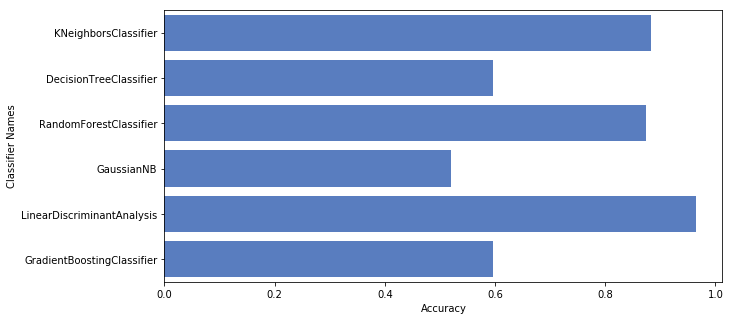

In [15]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set_color_codes("muted")
sns.barplot(x=accuracies, y=names, color="b")
plt.xlabel('Accuracy')
plt.ylabel('Classifier Names')


# Comparing accuracies of all the models that we used till now.

Linear Discriminant Analysis works great with the data but we will go for neural network in the later part of notebook

 ## Visualization of Data After Dimensionality Reduction Using PCA

Here I am trying to visualize the data by reducing the dimensions to plottable 3-dimensional data using PCA and ISO Map

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=3)
pca.fit(x_train)
Trans = pca.transform(x_train)

In [18]:
le = LabelEncoder()
lf = le.fit(y_train)
y_train = lf.transform(y_train)
print(y_train.shape)

(792,)


Visualising Using Matplotlib 3d visualization


In [19]:
def plot3D(Trans,y,name):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(xs=Trans[:,0],ys=Trans[:,1],zs=Trans[:,2],c=y, cmap = 'Accent',marker='o')
    plt.savefig(name+'.png')


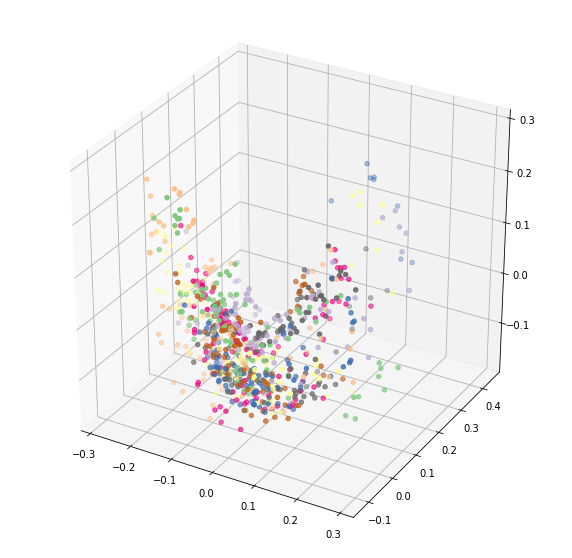

In [20]:
plot3D(Trans,y_train,'PCA')

 ## Visualization of Data After Dimensionality Reduction Using ISO

In [21]:
from sklearn.manifold import Isomap

In [22]:
iso = Isomap(n_components=3,n_neighbors=5)
iso.fit(x_train)
iso_trans = iso.transform(x_train)

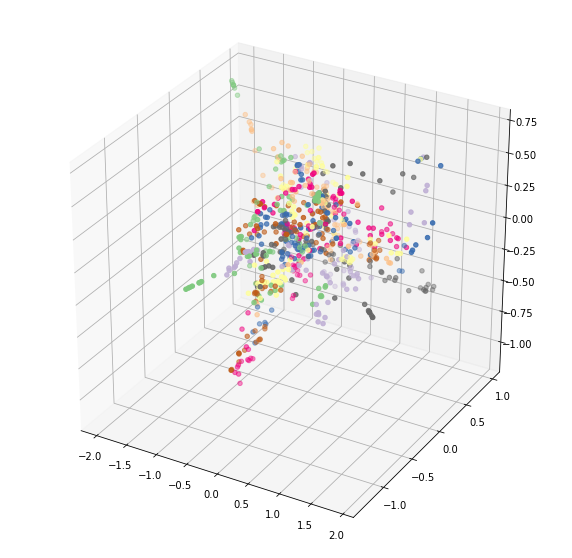

In [23]:
plot3D(iso_trans,y_train,'ISO')

## Using KNN on 3-Dimentional Data and Checking Performance, Variance Retained                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
#PCA Transform
knn.fit(Trans,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
print('Train LogLoss: {}'.format(log_loss(y_train,knn.predict_proba(Trans))))

Train LogLoss: 0.9372088230452974


In [27]:
knn.score(Trans,y_train)

0.5744949494949495

In [28]:
knn_full = KNeighborsClassifier()
knn_full.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
print('Train LogLoss: {}'.format(log_loss(y_train,knn_full.predict_proba(x_train))))

Train LogLoss: 0.2875094288955263


In [30]:
knn_full.score(x_train,y_train)

0.928030303030303

Looks like keeping the features is more efficient as PCA is not retaining the most of the variance of data thus KNN not performing well on reduced dimensionality data.

In [31]:
print ('Variance retained: {}'.format(pca.explained_variance_ratio_.sum()))

Variance retained: 0.33951616659459927


Her We can see that 3-features can define 33% of the dataset alone as given by PCA (insight driven from variance retained)

## Neural Network Model



Now here I am making my main Neural Network model which is capable of giving most accuracy without overfitting on traing data. Layers I Used are dense and dropout which activation function as Sigmoid which scales the layer output from -1 to 1.

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [33]:


model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))



In [34]:
data_train=pd.read_csv('train.csv')
data_train.pop('id')
y_train = data_train.pop('species')
x_train = data_train
y_train.head()
y_train=y_train.values
x_train=x_train.values
lf = le.fit(y_train)
y_train=lf.transform(y_train)

In [35]:
y_categ = to_categorical(y_train)
x_norm = StandardScaler().fit(x_train).transform(x_train)

In [36]:
x_tra,x_test,y_tra,y_test = train_test_split(x_norm,y_categ,test_size=0.2)

In [37]:
print(x_tra.shape,x_test.shape)
print(y_tra.shape,y_test.shape)

(792, 192) (198, 192)
(792, 99) (198, 99)


In [38]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')


In [39]:
history = model.fit(x_tra,y_tra,batch_size=128,epochs=100,shuffle=True,verbose=1)

Epoch 1/100
792/792 [==============================] - 0s 406us/step - loss: 4.7979
Epoch 2/100
792/792 [==============================] - 0s 134us/step - loss: 4.4417
Epoch 3/100
792/792 [==============================] - 0s 133us/step - loss: 4.1648
Epoch 4/100
792/792 [==============================] - 0s 136us/step - loss: 3.8855
Epoch 5/100
792/792 [==============================] - 0s 151us/step - loss: 3.6790
Epoch 6/100
792/792 [==============================] - 0s 141us/step - loss: 3.4366
Epoch 7/100
792/792 [==============================] - 0s 136us/step - loss: 3.2090
Epoch 8/100
792/792 [==============================] - 0s 133us/step - loss: 3.0001
Epoch 9/100
792/792 [==============================] - 0s 134us/step - loss: 2.7958
Epoch 10/100
792/792 [==============================] - 0s 135us/step - loss: 2.6044
Epoch 11/100
792/792 [==============================] - 0s 144us/step - loss: 2.4027
Epoch 12/100
792/792 [==============================] - 0s 137us/step - lo

In [40]:
score = model.evaluate(x_test,y_test)
print('CV Score: {}'.format(round(score,3)))

198/198 [==============================] - 0s 305us/step
CV Score: 0.06


In [41]:
preds = model.predict(x_test,verbose=1)

198/198 [==============================] - 0s 557us/step


In [42]:
from sklearn.metrics import accuracy_score
temp_y_true=[]
temp_y_pred=[]
for ix in range(0,y_test.shape[0]):
    temp_y_pred.append(np.argmax(preds[ix]))
    temp_y_true.append(np.argmax(y_test[ix]))
print('Accuracy: {}'.format(accuracy_score(temp_y_true,temp_y_pred)))

Accuracy: 0.9797979797979798


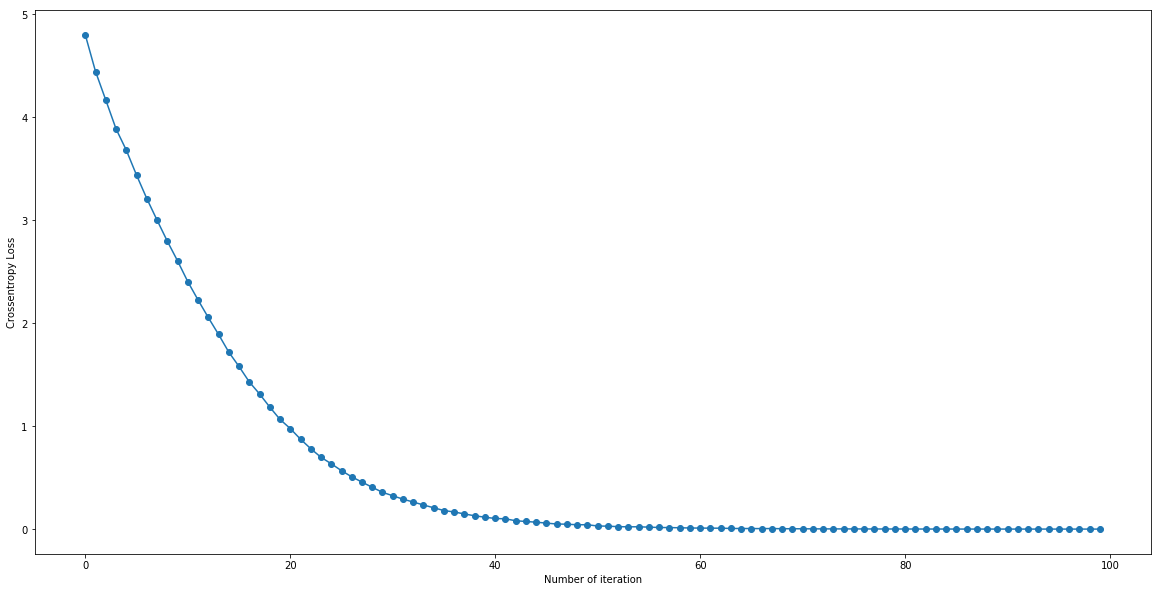

In [43]:
fig = plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], 'o-')
plt.xlabel('Number of iteration')
plt.ylabel('Crossentropy Loss')
plt.savefig('Loss.png')

Here we Can see neural network is giving best reults on the actual training data. Though 20% of which was kept unseen by the model but the actual testing data is not labelled in te dataset and kaggle only has the actual labelled test data. Although our model didnt overfit on the training data since it gave quite goot accuracy on test data shuffled out by train_test_split. Lets see the final model graph.

In [44]:
accuracies.append(accuracy_score(temp_y_true,temp_y_pred))
names.append('Neural Network')

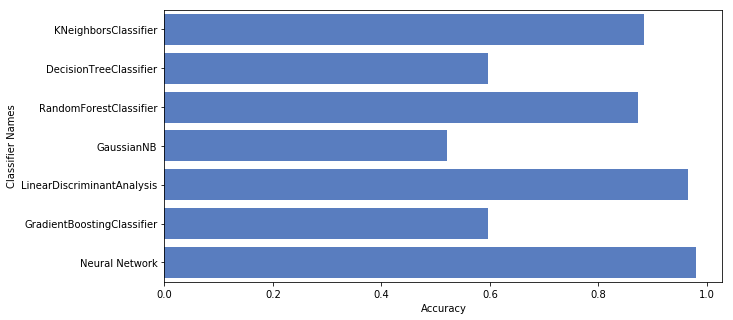

In [45]:
plt.figure(figsize=(10,5))
sns.set_color_codes("muted")
sns.barplot(x=accuracies, y=names,color="b")
plt.xlabel('Accuracy')
plt.ylabel('Classifier Names')
plt.savefig('acc.png')